In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme(style="white")

In [2]:
df = pd.read_csv("sim.csv",
                  names=["label", "sigma", "util", "welfare", "incentive", "fairness", "avg_fairness", "alt_metric", "sel_metric"])
df.head()

,label,sigma,util,welfare,incentive,fairness,avg_fairness,alt_metric,sel_metric
0,static,0,0.738453,0.738039,0.0,0.986830,0.500153,0.000000e+00,0.000000e+00
1,maxmin,0,0.976151,0.975594,0.0,0.995053,0.901833,0.000000e+00,0.000000e+00
2,karma,0,0.976134,0.975614,0.0,0.971763,0.539169,1.000240e+07,1.000240e+07
3,mpsp,0,0.976151,0.722831,0.0,0.884942,0.801094,7.268770e+01,7.268770e+01
4,sharp,0,0.976151,0.975590,0.0,0.996350,0.614863,2.082800e+00,2.082800e+00


### Utilization

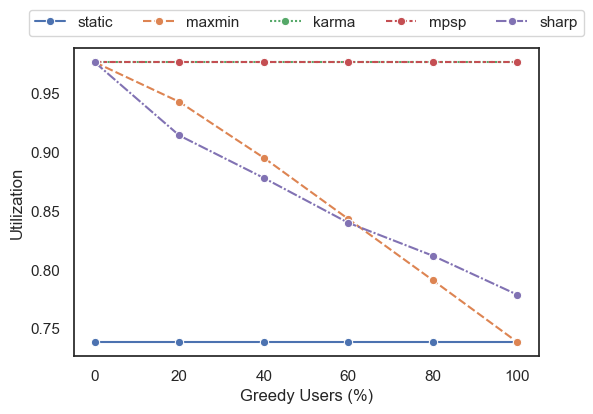

In [3]:
plt.figure(figsize=(6, 4))
sns.lineplot(x="sigma", y="util", hue="label", style="label", data=df, marker="o")
plt.xlabel("Greedy Users (%)")
plt.ylabel("Utilization")
plt.legend(title=None, bbox_to_anchor=(0.5, 1.15), loc="upper center", ncol=5)

plt.savefig("utilization.png", bbox_inches="tight")
plt.show()

### Welfare

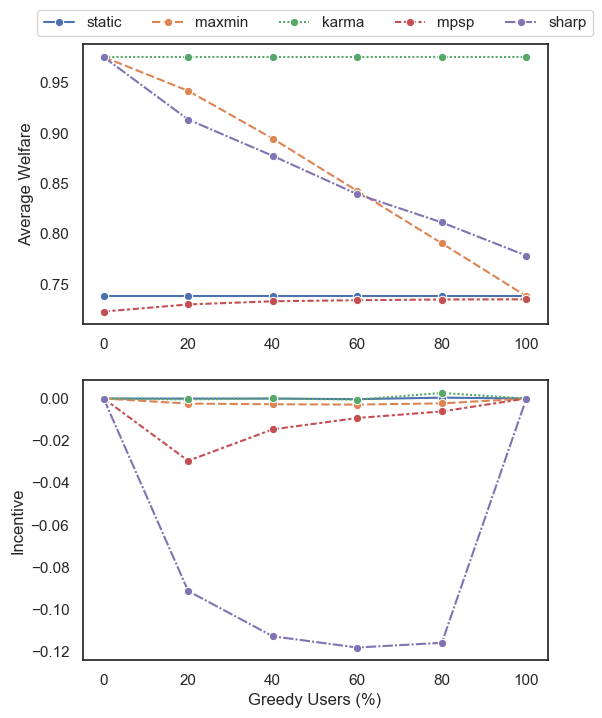

In [4]:
plt.figure(figsize=(6, 8))
plt.subplot(2, 1, 1)
sns.lineplot(x="sigma", y="welfare", hue="label", style="label", data=df, marker="o")
plt.xlabel("")
plt.ylabel("Average Welfare")
plt.legend(title=None, bbox_to_anchor=(0.5, 1.15), loc="upper center", ncol=5)

plt.subplot(2, 1, 2)
sns.lineplot(x="sigma", y="incentive", hue="label", style="label", data=df, marker="o")
plt.xlabel("Greedy Users (%)")
plt.ylabel("Incentive")
plt.legend([], frameon=False)

plt.savefig("welfare.png", bbox_inches="tight")
plt.show()

### Fairness

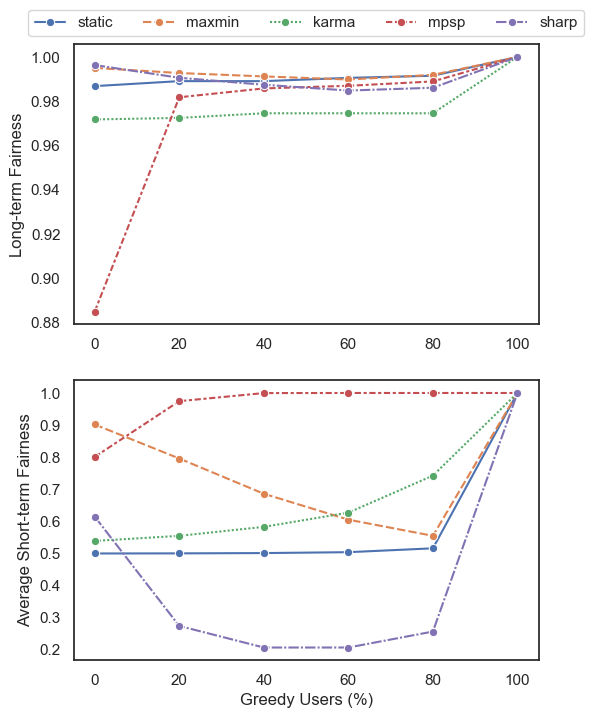

In [5]:
plt.figure(figsize=(6, 8))
plt.subplot(2, 1, 1)
sns.lineplot(x="sigma", y="fairness", hue="label", style="label", data=df, marker="o")
plt.xlabel("")
plt.ylabel("Long-term Fairness")
plt.legend(title=None, bbox_to_anchor=(0.5, 1.15), loc="upper center", ncol=5)

plt.subplot(2, 1, 2)
sns.lineplot(x="sigma", y="avg_fairness", hue="label", style="label", data=df, marker="o")
plt.xlabel("Greedy Users (%)")
plt.ylabel("Average Short-term Fairness")
plt.legend([], frameon=False)

plt.savefig("fairness.png", bbox_inches="tight")
plt.show()

### Disparity Metrics

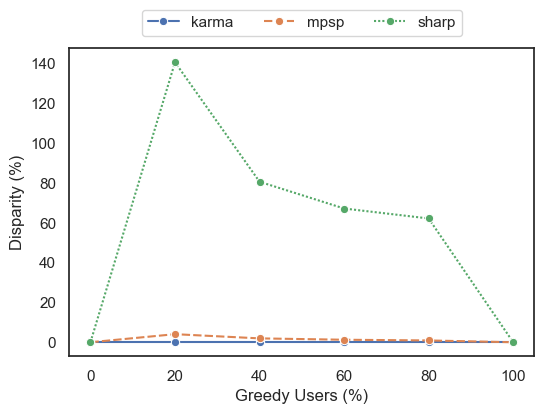

In [6]:
plt.figure(figsize=(6, 4))

df["metric_diff"] = (df["sel_metric"] - df["alt_metric"]) / df["alt_metric"] * 100
df.loc[df["label"] == "mpsp", "metric_diff"] *= -1
df_metric = df[df["label"].isin(["karma", "mpsp", "sharp"])]

sns.lineplot(x="sigma", y="metric_diff", hue="label", style="label", data=df_metric, marker="o")
plt.xlabel("Greedy Users (%)")
plt.ylabel("Disparity (%)")
plt.legend(title=None, bbox_to_anchor=(0.5, 1.15), loc="upper center", ncol=5)

plt.savefig("disparity.png", bbox_inches="tight")
plt.show()